## Imports

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/KennedyRMenezes/DataScience/refs/heads/master/Datasets/Preco_casas/Pre%C3%A7os_de_casas.csv")

## Significado das colunas do Data Set

- area_primeiro_andar: Refere-se à área do primeiro andar da propriedade, medida em metros quadrados.

- existe_segundo_andar: Esta variável é binária, indicando se a propriedade possui ou não um segundo andar.
  - Pode ser representada como 1 para "sim" e 0
para "não".

- area_segundo_andar: Se a propriedade tiver um segundo andar, esta variável representa a área total do segundo andar, medida em metros quadrados.

- quantidade_banheiros: Indica o número total de banheiros na propriedade.

- capacidade_carros_garagem: Esta variável indica a capacidade da garagem da casa

- propriedade, ou seja, o número máximo de carros que podem ser estacionados na garagem.

- qualidade_da_cozinha_Excelente: Esta é uma variável categórica que avalia a qualidade da cozinha na propriedade.
 - Se a cozinha for considerada "Excelente" é representada por 1, e caso contrário, por 0.

- preco_de_venda: Este é o preço de venda da propriedade em reais. É a variável alvo que se tenta prever usando os outros atributos da propriedade.

## Exploração e Tratamento

In [ ]:
df.head()

,Id,area_primeiro_andar,existe_segundo_andar,area_segundo_andar,quantidade_banheiros,capacidade_carros_garagem,qualidade_da_cozinha_Excelente,preco_de_venda
0,1,79.5224,1,79.3366,2,548,0,1027905.0
1,2,117.2398,0,0.0000,2,460,0,894795.0
2,3,85.4680,1,80.4514,2,608,0,1101855.0
3,4,89.2769,1,70.2324,1,642,0,690200.0
4,5,106.3705,1,97.8237,2,836,0,1232500.0


In [ ]:
df.describe()

,Id,area_primeiro_andar,existe_segundo_andar,area_segundo_andar,quantidade_banheiros,capacidade_carros_garagem,qualidade_da_cozinha_Excelente,preco_de_venda
count,1438.000000,1438.000000,1438.000000,1438.000000,1438.000000,1438.000000,1438.000000,1.438000e+03
mean,730.939499,106.602556,0.431154,31.888410,1.556328,470.381780,0.065369,8.802488e+05
std,422.336441,33.040598,0.495410,39.952846,0.542512,211.875916,0.247261,3.697203e+05
min,1.000000,31.028600,0.000000,0.000000,0.000000,0.000000,0.000000,1.720570e+05
25%,364.250000,81.682325,0.000000,0.000000,1.000000,326.000000,0.000000,6.384350e+05
50%,733.500000,100.332000,0.000000,0.000000,2.000000,477.500000,0.000000,7.980438e+05
75%,1096.750000,127.458800,1.000000,67.631200,2.000000,576.000000,0.000000,1.045160e+06
max,1460.000000,223.145800,1.000000,168.892200,3.000000,1390.000000,1.000000,3.081250e+06


<Axes: >

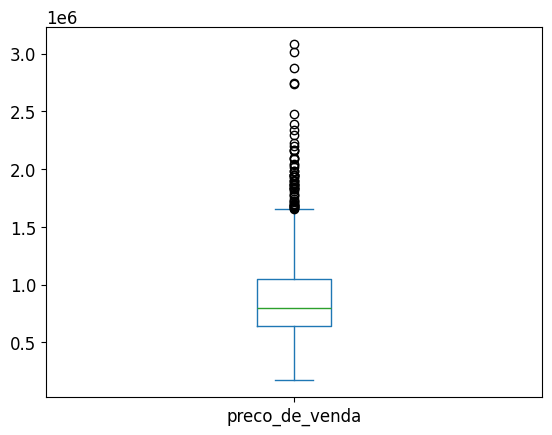

In [ ]:
df['preco_de_venda'].plot(kind="box")

In [ ]:
Q1 = df['preco_de_venda'].quantile(0.25)
Q3 = df['preco_de_venda'].quantile(0.75)
IQR = Q3 - Q1

# Limites inferior e superior
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrar os dados sem outliers
df_sem_outliers = df[(df['preco_de_venda'] >= limite_inferior) & (df['preco_de_venda'] <= limite_superior)]
print(len(df) -len(df_sem_outliers))


59


In [ ]:
df = df_sem_outliers.reset_index(drop=True)

Coluna 'capacidade_carros_garagem' veio na casa das centenas com milhar, dividi por 100 para fazer mais sentido.

In [ ]:
df['capacidade_carros_garagem'] = [int(x/100) for x in df['capacidade_carros_garagem']]

In [ ]:
df['capacidade_carros_garagem'].describe()

,capacidade_carros_garagem
count,1379.000000
mean,4.084844
std,1.961730
min,0.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,13.000000


Fiz uma combinação de coluna para, talvez depois, retirar area primeiro e segundo andar.

In [ ]:
df["area_total"] = df["area_primeiro_andar"] + df["area_segundo_andar"]

Troca a penultima e ultima coluna de lugar.

O target que é o 'preco_de_venda' não estava na última coluna.

In [ ]:
df = df[[col for col in df.columns if col != 'preco_de_venda'] + ['preco_de_venda']]

In [ ]:
df

,Id,area_primeiro_andar,existe_segundo_andar,area_segundo_andar,quantidade_banheiros,capacidade_carros_garagem,qualidade_da_cozinha_Excelente,area_total,preco_de_venda
0,1,79.5224,1,79.3366,2,5,0,158.8590,1027905.00
1,2,117.2398,0,0.0000,2,4,0,117.2398,894795.00
2,3,85.4680,1,80.4514,2,6,0,165.9194,1101855.00
3,4,89.2769,1,70.2324,1,6,0,159.5093,690200.00
4,5,106.3705,1,97.8237,2,8,0,204.1942,1232500.00
...,...,...,...,...,...,...,...,...,...
1374,1456,88.5337,1,64.4726,2,4,0,153.0063,862750.00
1375,1457,192.5817,0,0.0000,2,5,0,192.5817,1035300.00
1376,1458,110.3652,1,107.0208,2,2,0,217.3860,1313845.00
1377,1459,100.1462,0,0.0000,1,2,0,100.1462,700676.25


Mudando a coluna de 'area_total' para a quinta posição para ficar visualmente mais interessante.

In [ ]:
cols = [col for col in df.columns if col != "area_total"]

cols.insert(4, 'area_total')

df = df[cols]

In [ ]:
df

,Id,area_primeiro_andar,existe_segundo_andar,area_segundo_andar,area_total,quantidade_banheiros,capacidade_carros_garagem,qualidade_da_cozinha_Excelente,preco_de_venda
0,1,79.5224,1,79.3366,158.8590,2,5,0,1027905.00
1,2,117.2398,0,0.0000,117.2398,2,4,0,894795.00
2,3,85.4680,1,80.4514,165.9194,2,6,0,1101855.00
3,4,89.2769,1,70.2324,159.5093,1,6,0,690200.00
4,5,106.3705,1,97.8237,204.1942,2,8,0,1232500.00
...,...,...,...,...,...,...,...,...,...
1374,1456,88.5337,1,64.4726,153.0063,2,4,0,862750.00
1375,1457,192.5817,0,0.0000,192.5817,2,5,0,1035300.00
1376,1458,110.3652,1,107.0208,217.3860,2,2,0,1313845.00
1377,1459,100.1462,0,0.0000,100.1462,1,2,0,700676.25


Renomeando colunas

In [ ]:
df.rename(columns={'area_primeiro_andar': 'area_1_andar',
                   'existe_segundo_andar': 'segundo_andar',
                   'area_segundo_andar': 'area_2_andar',
                   'quantidade_banheiros': 'num_banheiros',
                   'capacidade_carros_garagem': 'capacidade_garagem',
                   'qualidade_da_cozinha_Excelente': 'qualidade_cozinha'}, inplace=True)

Verificando a distribuição das colunas numéricas

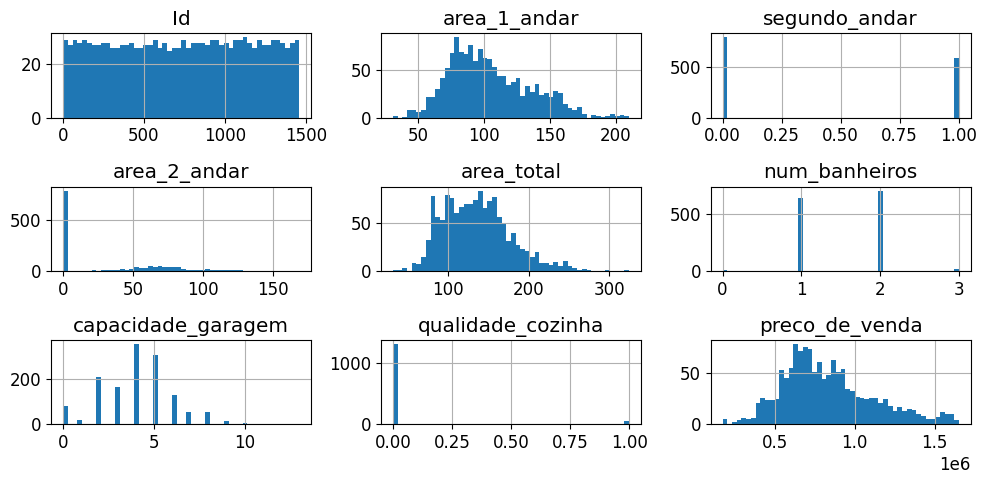

In [ ]:
plt.rc('font', size=12)
df.hist(bins=50, figsize=(10,5))
plt.tight_layout()
plt.show()

## Criando o conjunto de testes

Criando o conjunto de testes estratificado, pois poucos dados.

### Analisando a estratificação

Antes de criar o conjunto de testes seria interessante descobrir o atributo que possui mais correlação com a variável dependente e então estratificar por essa variável.

In [ ]:
df_corr = df.corr()['preco_de_venda'].sort_values(ascending=False)
df_corr

,preco_de_venda
preco_de_venda,1.000000
area_total,0.699198
capacidade_garagem,0.609444
num_banheiros,0.576560
area_1_andar,0.547602
qualidade_cozinha,0.319723
area_2_andar,0.314777
segundo_andar,0.153808
Id,-0.011935


In [ ]:
df_corr_area = df.corr()['area_2_andar'].sort_values(ascending=False)
df_corr_area

,area_2_andar
area_2_andar,1.000000
segundo_andar,0.922343
area_total,0.707373
num_banheiros,0.395156
preco_de_venda,0.314777
capacidade_garagem,0.103877
Id,0.011367
qualidade_cozinha,-0.003706
area_1_andar,-0.302057


Podemos verificar que area_total tem a maior correlação com o preco_de_venda, então fazer uma estratificação para podermos fazer o conjunto testes representativo.

Mas antes disso, seria interessante retirar as colunas de area_primeiro_andar e area_segundo_andar já que area_total é composta por essas duas.

In [ ]:
df = df.drop(columns=['area_1_andar', 'area_2_andar', "Id"])
df

,Id,segundo_andar,area_total,num_banheiros,capacidade_garagem,qualidade_cozinha,preco_de_venda
0,1,1,158.8590,2,5,0,1027905.00
1,2,0,117.2398,2,4,0,894795.00
2,3,1,165.9194,2,6,0,1101855.00
3,4,1,159.5093,1,6,0,690200.00
4,5,1,204.1942,2,8,0,1232500.00
...,...,...,...,...,...,...,...
1374,1456,1,153.0063,2,4,0,862750.00
1375,1457,0,192.5817,2,5,0,1035300.00
1376,1458,1,217.3860,2,2,0,1313845.00
1377,1459,0,100.1462,1,2,0,700676.25


Fazendo a estratificação

In [ ]:
df['area_total'].describe()

,area_total
count,1379.000000
mean,135.070267
std,41.660571
min,31.028600
25%,103.211900
50%,132.661200
75%,159.788000
max,324.499700


In [ ]:
print("Amplitude: ", ( df['area_total'].max() - df['area_total'].min() ) / 5)
estrat = list(np.arange(31, 336, 80))
# remove ultimo elemento para colocar inf
estrat.pop(-1)
estrat.append(np.inf)
# adiciona limite inferior de zero
estrat.insert(0,0)
print("Limites para a estratificação: ", estrat)

Amplitude:  58.694219999999994
Limites para a estratificação:  [0, np.int64(31), np.int64(111), np.int64(191), inf]


In [ ]:
df['area_categoria'] = pd.cut(df['area_total'],
                              bins=estrat,
                              labels=[1,2,3,4])

<Axes: >

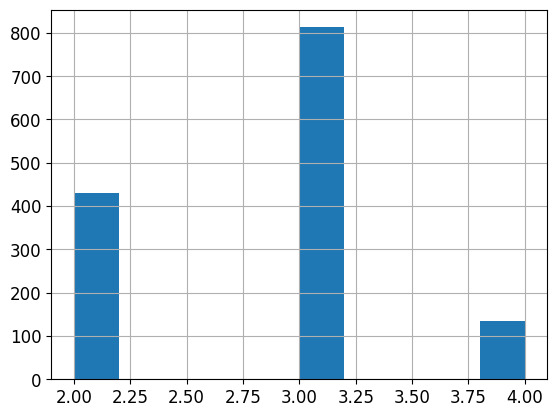

In [ ]:
df['area_categoria'].hist()

### Verificando a proporção da estratificação

Vamos verificar a proporção

In [ ]:
unique_vals_cat = df['area_categoria'].unique()

total = len(df['area_categoria'])

for i in unique_vals_cat:
  count_val = (df['area_categoria'] == i).sum()
  print(round(count_val/total, 2)*100)

# Outra maneira de verificar as proporções
# prop = df['area_categoria].value_counts(normalize=True)

59.0
10.0
31.0


In [ ]:
cols = [col for col in df.columns if col != 'area_categoria']

cols.insert(3, 'area_categoria')

df = df[cols]

In [ ]:
df

,Id,segundo_andar,area_total,area_categoria,num_banheiros,capacidade_garagem,qualidade_cozinha,preco_de_venda
0,1,1,158.8590,3,2,5,0,1027905.00
1,2,0,117.2398,3,2,4,0,894795.00
2,3,1,165.9194,3,2,6,0,1101855.00
3,4,1,159.5093,3,1,6,0,690200.00
4,5,1,204.1942,4,2,8,0,1232500.00
...,...,...,...,...,...,...,...,...
1374,1456,1,153.0063,3,2,4,0,862750.00
1375,1457,0,192.5817,4,2,5,0,1035300.00
1376,1458,1,217.3860,4,2,2,0,1313845.00
1377,1459,0,100.1462,2,1,2,0,700676.25


### Construção do teste estratificado

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=101)

for train_index, test_index in splitter.split(df, df['area_categoria']):
  strat_train_set = df.loc[train_index]
  strat_test_set = df.loc[test_index]

In [ ]:
strat_test_set['area_categoria'].value_counts() / len(strat_test_set)

,count
area_categoria,
3,0.589372
2,0.311594
4,0.099034
1,0.000000


Comparação entre uma separação estratificada e uma não estratificada

In [ ]:
def area_proportion(data):
  return data['area_categoria'].value_counts() / len(data)

train_set, test_set = train_test_split(df, test_size=0.3, random_state=101)

compare_props = pd.DataFrame({
    "Overall %": area_proportion(df),
    "Stratified %": area_proportion(strat_test_set),
    "Random %": area_proportion(test_set),
}).sort_index()

compare_props.index.name = "Area Categoria"
compare_props['Strat. Error %'] = (compare_props['Stratified %'] / compare_props['Overall %'] - 1)
compare_props['Rand. Error %'] = (compare_props['Random %'] / compare_props['Overall %'] - 1)
(compare_props * 100).round(2)

,Overall %,Stratified %,Random %,Strat. Error %,Rand. Error %
Area Categoria,,,,,
1,0.00,0.00,0.00,NaN,NaN
2,31.25,31.16,31.64,-0.30,1.24
3,58.96,58.94,60.39,-0.03,2.43
4,9.79,9.90,7.97,1.16,-18.58


In [ ]:
for set_ in (strat_train_set, strat_test_set):
  set_.drop('area_categoria', axis=1, inplace=True)

## Preparando dados para Machine Learning

In [ ]:
casa = strat_train_set.drop("preco_de_venda", axis=1)
casa_target = strat_train_set["preco_de_venda"].copy()

In [ ]:
casa

,Id,segundo_andar,area_total,num_banheiros,capacidade_garagem,qualidade_cozinha
400,425,0,111.1084,1,2,0
77,81,1,198.9918,2,5,0
683,734,0,106.2776,1,2,0
564,602,1,127.7375,1,5,0
876,936,0,69.3963,1,5,0
...,...,...,...,...,...,...
674,725,0,157.7442,2,7,1
900,960,1,131.5464,2,4,0
591,630,0,125.4150,1,5,0
1009,1076,1,161.6460,1,2,0


Serve para verificar se há dados faltantes, não é o caso desse conjunto de dados.

In [ ]:
null_rows_idx = df.isnull().any(axis=1)
df.loc[null_rows_idx].head()

,Id,segundo_andar,area_total,area_categoria,num_banheiros,capacidade_garagem,qualidade_cozinha,preco_de_venda


Usando Imputer para colocar a mediana nos dados.

Usando Standardize para normalizar os dados em uma escala semelhante.

Usando Pipeline para agregar as trasnformações.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

In [ ]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('standardize', StandardScaler()),
])

In [ ]:
from sklearn import set_config

set_config(display='diagram')

num_pipeline

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('standardize', StandardScaler())])

### Selecionando e Treinando um Modelo


#### Training and Evaluating on the Training Set

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = make_pipeline(num_pipeline, LinearRegression())
lin_reg.fit(casa, casa_target)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                                 ('standardize', StandardScaler())])),
                ('linearregression', LinearRegression())])

In [ ]:
casa_pred = lin_reg.predict(casa)
casa_pred[:5].round(-2)

array([ 649700., 1079600.,  629900.,  711600.,  606400.])

Comparar com com os valores reais

In [ ]:
casa_target.iloc[:5].values

array([685270., 953955., 647802., 695130., 393907.])

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(casa_target, casa_pred)
mse = mean_squared_error(casa_target, casa_pred)
r2 = r2_score(casa_target, casa_pred)

print(f"MAE:  {mae:.2f}")
print(f"MSE:  {mse:.2f}")
print(f"RMSE: {np.sqrt(mse):.2f}")
print(f"R²:   {r2:.2f}")

MAE:  114232.22
MSE:  25510999158.44
RMSE: 159721.63
R²:   0.68


Medidas alterando dataset

In [ ]:
# COM OUTLIERS
# MAE:  128623.76
# MSE:  35263641927.25
# RMSE: 187786.16
# R²:   0.74

# SEM OUTLIERS
# MAE:  114225.06
# MSE:  25513641110.21
# RMSE: 159729.90
# R²:   0.68

# SEM OUTLIERS e SEM COLUNA qualidade_cozinha
# MAE:  116967.42
# MSE:  27390637342.55
# RMSE: 165501.17
# R²:   0.66

# SEM OUTLIERS E SÓ COM COLUNAS DE area_total E preco_de_venda
# MAE:  152440.04
# MSE:  41667095889.14
# RMSE: 204125.20
# R²:   0.48

Histograma de Resíduos

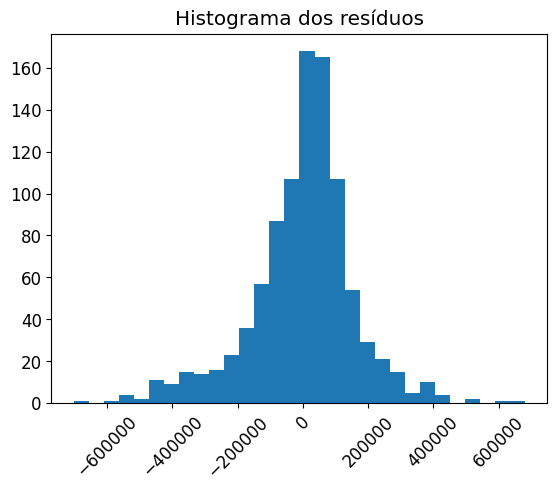

In [ ]:
import matplotlib.pyplot as plt

residuos = casa_target - casa_pred

plt.hist(residuos, bins=30)
plt.title('Histograma dos resíduos')
plt.xticks(rotation=45)
plt.show()

Q-Q Plot

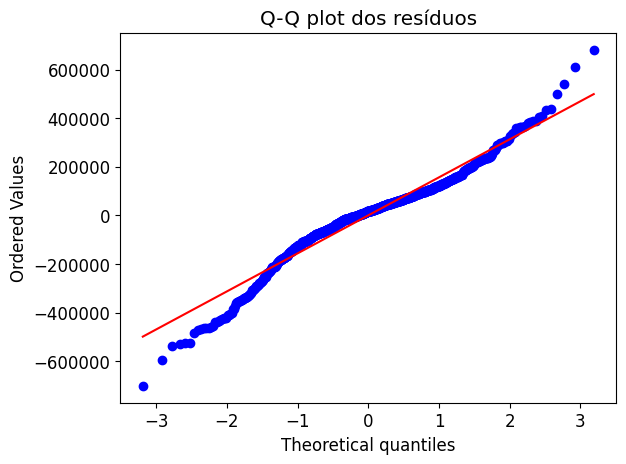

In [ ]:
import scipy.stats as stats
import matplotlib.pyplot as plt

stats.probplot(residuos, dist="norm", plot=plt)
plt.title("Q-Q plot dos resíduos")
plt.show()

Homocedasticidade

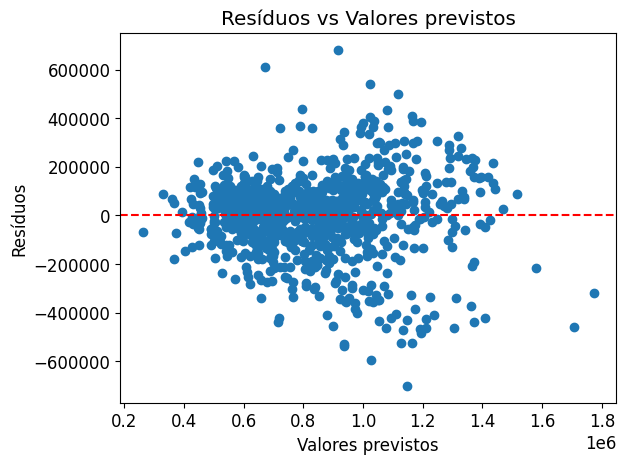

In [ ]:
plt.scatter(casa_pred, residuos)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valores previstos')
plt.ylabel('Resíduos')
plt.title('Resíduos vs Valores previstos')
plt.show()
